In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
movies_md = pd.read_csv('Dataset/movies_metadata.csv')
movies_links = pd.read_csv('Dataset/links_small.csv')
movies_credits = pd.read_csv('Dataset/credits.csv')
movies_ratings = pd.read_csv('Dataset/ratings_small.csv')
movies_keywords = pd.read_csv('Dataset/keywords.csv')

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
movies_md.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
movies_md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [5]:
movies_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:
movies_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9125 non-null   int64  
 1   imdbId   9125 non-null   int64  
 2   tmdbId   9112 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 214.0 KB


In [7]:
movies_credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [8]:
movies_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [9]:
movies_ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [10]:
movies_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [11]:
movies_keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [12]:
movies_keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


In [13]:
movies_links.rename(columns = {'tmdbId':'id'}, inplace = True)
movies_links = movies_links[movies_links['id'].notnull()]
movies_links['id'] = movies_links['id'].astype('int')
movies_links.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9112 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   movieId  9112 non-null   int64
 1   imdbId   9112 non-null   int64
 2   id       9112 non-null   int32
dtypes: int32(1), int64(2)
memory usage: 249.2 KB


<AxesSubplot:>

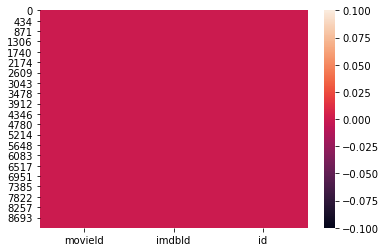

In [14]:
sns.heatmap(movies_links.isnull())

In [15]:
movies_links.head()

,movieId,imdbId,id
0,1,114709,862
1,2,113497,8844
2,3,113228,15602
3,4,114885,31357
4,5,113041,11862


In [16]:
#movies_md['id'] = movies_md['id'].astype('int')

In [17]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan
    
movies_md['id'] = movies_md['id'].apply(convert_int)
movies_md[movies_md['id'].isnull()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",NaN,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",NaN,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
movies_md.drop([19730,29503,35587],inplace=True)

In [19]:
movies_md.shape

(45463, 24)

In [20]:
movies_md.drop_duplicates(subset = ['id'],inplace=True)

In [21]:
movies_md.shape

(45433, 24)

In [22]:
movies_smd = pd.merge(movies_links, movies_md, on = 'id',how='left')

In [23]:
movies_smd.shape

(9112, 26)

<AxesSubplot:>

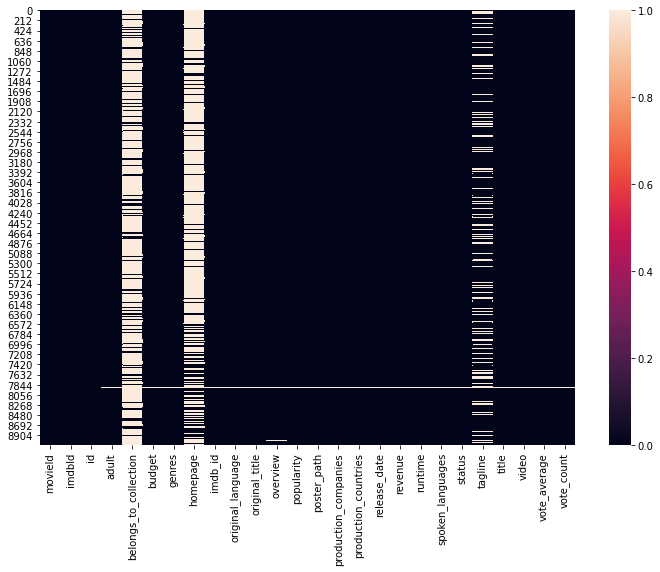

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(movies_smd.isnull())

In [25]:
#sns.countplot(movies_credits.duplicated(subset=['id']))

In [26]:
movies_smd.columns

Index(['movieId', 'imdbId', 'id', 'adult', 'belongs_to_collection', 'budget',
       'genres', 'homepage', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [27]:
movies_smd = movies_smd[['movieId','id','genres','title',]]
movies_smd.head()

,movieId,id,genres,title
0,1,862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story
1,2,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji
2,3,15602,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men
3,4,31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Waiting to Exhale
4,5,11862,"[{'id': 35, 'name': 'Comedy'}]",Father of the Bride Part II


In [28]:
movies_credits.drop_duplicates(subset = ['id'],inplace=True)
movies_smd = pd.merge(movies_smd, movies_credits, on = 'id',how='left')
movies_smd.head()

,movieId,id,genres,title,cast,crew
0,1,862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,2,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,3,15602,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,4,31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Waiting to Exhale,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,5,11862,"[{'id': 35, 'name': 'Comedy'}]",Father of the Bride Part II,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


<AxesSubplot:>

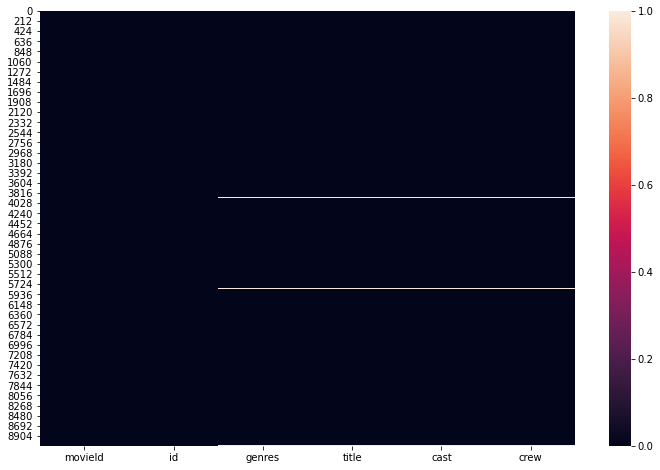

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(movies_smd.isnull())

In [30]:
movies_smd.dropna(inplace=True)
movies_smd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9082 entries, 0 to 9109
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9082 non-null   int64 
 1   id       9082 non-null   int32 
 2   genres   9082 non-null   object
 3   title    9082 non-null   object
 4   cast     9082 non-null   object
 5   crew     9082 non-null   object
dtypes: int32(1), int64(1), object(4)
memory usage: 461.2+ KB


In [31]:
movies_smd['genre'] = movies_smd['genres'].apply(lambda x: [i['name'] for i in eval(x)])
movies_smd['actor']=movies_smd['cast'].apply(lambda x: [i['name'] for i in eval(x)])

def director(col):
    for i in eval(col):
        if i['job']=='Director':
            return i['name']

movies_smd['director']=movies_smd['crew'].apply(director)
movies_smd.drop(['id','genres','cast','crew'],inplace = True,axis=1)
movies_smd.head()

,movieId,title,genre,actor,director
0,1,Toy Story,"[Animation, Comedy, Family]","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter
1,2,Jumanji,"[Adventure, Fantasy, Family]","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston
2,3,Grumpier Old Men,"[Romance, Comedy]","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",Howard Deutch
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]","[Whitney Houston, Angela Bassett, Loretta Devi...",Forest Whitaker
4,5,Father of the Bride Part II,[Comedy],"[Steve Martin, Diane Keaton, Martin Short, Kim...",Charles Shyer


In [37]:
movies_smd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9082 entries, 0 to 9109
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movieId   9082 non-null   int64 
 1   title     9082 non-null   object
 2   genre     9082 non-null   object
 3   actor     9082 non-null   object
 4   director  9058 non-null   object
dtypes: int64(1), object(4)
memory usage: 425.7+ KB


In [32]:
users_df = pd.DataFrame(movies_ratings['userId'].unique(), columns=['userId'])
ratings_df = movies_ratings.drop('timestamp',axis=1)

In [33]:
movies_df = movies_smd[['movieId','title']]

In [34]:
movies_genres = movies_smd[['movieId','genre']]

#define a function to split genres field
def get_movie_genres(movieId):
    movie = movies_genres[movies_genres['movieId']==movieId]
    genre = movie['genre'].tolist()
    df = pd.DataFrame([b for a in genre for b in a], columns=['genre'])
    df.insert(loc=0, column='movieId', value=movieId)
    return df

#create empty df
movies_genres_df = pd.DataFrame(columns=['movieId','genre'])
for x in movies_genres['movieId'].tolist():
    movies_genres_df=movies_genres_df.append(get_movie_genres(x))
movies_genres_df.head()

,movieId,genre
0,1,Animation
1,1,Comedy
2,1,Family
0,2,Adventure
1,2,Fantasy


In [36]:
pd.DataFrame(movies_genres_df['movieId'].unique()).shape

(9047, 1)

In [59]:
ratings_df = ratings_df[ratings_df['movieId'].isin(movies_genres_df['movieId'])]

In [36]:
genres_df = pd.DataFrame(movies_genres_df['genre'].unique(), columns=['genre'])

In [37]:
movies_actors = movies_smd[['movieId','actor']]

#define a function to split actors
def get_movie_actors(movieId):
    movie = movies_actors[movies_actors['movieId']==movieId]
    actor = movie['actor'].tolist()
    df = pd.DataFrame([b for a in actor for b in a], columns=['actor'])
    df.insert(loc=0, column='movieId', value=movieId)
    return df

#create empty df
movies_actors_df = pd.DataFrame(columns=['movieId','actor'])
for x in movies_actors['movieId'].tolist():
    movies_actors_df=movies_actors_df.append(get_movie_actors(x))
movies_actors_df.head()

,movieId,actor
0,1,Tom Hanks
1,1,Tim Allen
2,1,Don Rickles
3,1,Jim Varney
4,1,Wallace Shawn


In [38]:
actors_df = pd.DataFrame(movies_actors_df['actor'].unique(), columns=['actor'])
actors_df.head()

,actor
0,Tom Hanks
1,Tim Allen
2,Don Rickles
3,Jim Varney
4,Wallace Shawn


In [39]:
movies_directors_df = movies_smd[['movieId','director']]
movies_directors_df.dropna(inplace=True)
movies_directors_df.head()

<ipython-input-39-5f4997213e8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_directors_df.dropna(inplace=True)


,movieId,director
0,1,John Lasseter
1,2,Joe Johnston
2,3,Howard Deutch
3,4,Forest Whitaker
4,5,Charles Shyer


In [40]:
directors_df = pd.DataFrame(movies_directors_df['director'].unique(), columns=['director'])
directors_df.head()

,director
0,John Lasseter
1,Joe Johnston
2,Howard Deutch
3,Forest Whitaker
4,Charles Shyer


In [61]:
users_df.to_csv('users.csv', header=True, index=False)
movies_df.to_csv('movies.csv', header=True, index=False)
genres_df.to_csv('genres.csv', header=True, index=False)
ratings_df.to_csv('ratings.csv', header=True, index=False)
movies_genres_df.to_csv('movies_genres.csv', header=True, index=False)
actors_df.to_csv('actors.csv', header=True, index=False)
directors_df.to_csv('directors.csv', header=True, index=False)
movies_actors_df.to_csv('movies_actors.csv', header=True, index=False)
movies_directors_df.to_csv('movies_directors.csv', header=True, index=False)

In [1]:
from py2neo import Graph

In [2]:
graph = Graph("bolt://localhost:7687", user = "neo4j", password = "password", name = "moviesdb")

In [3]:
graph.run('''CREATE OR REPLACE DATABASE moviesdb''')

(No data)

In [4]:
graph.run('''
LOAD CSV WITH HEADERS FROM
'file:///movies.csv' AS row
CREATE (:Movie {title: row.title, movieId: toInteger(row.movieId)})
''')

(No data)

In [5]:
graph.run('''
LOAD CSV WITH HEADERS FROM
'file:///users.csv' AS row
CREATE (:User {userId: toInteger(row.userId)})
''')

(No data)

In [6]:
graph.run('''
LOAD CSV WITH HEADERS FROM
'file:///genres.csv' AS row
CREATE (:Genre {name: row.genre})
''')

(No data)

In [7]:
graph.run('''
LOAD CSV WITH HEADERS FROM
'file:///actors.csv' AS row
CREATE (:Person {name: row.actor})
''')

(No data)

In [8]:
graph.run('''
LOAD CSV WITH HEADERS FROM
'file:///directors.csv' AS row
MERGE (:Person {name: row.director})
''')

(No data)

In [9]:
graph.run('''CREATE CONSTRAINT ON (user:User) ASSERT user.userId IS UNIQUE''')

(No data)

In [10]:
graph.run('''CREATE CONSTRAINT ON (movie:Movie) ASSERT movie.movieId IS UNIQUE''')

(No data)

In [11]:
graph.run('''
LOAD CSV WITH HEADERS FROM
'file:///ratings.csv' AS row
MATCH (user:User {userId: toInteger(row.userId)})
MATCH (movie:Movie {movieId: toInteger(row.movieId)})
MERGE (user)-[:RATED {rating: toFloat(row.rating)}]->(movie)
''')

(No data)

In [12]:
graph.run('''CREATE CONSTRAINT ON (genre:Genre) ASSERT genre.name IS UNIQUE''')

(No data)

In [13]:
graph.run('''
LOAD CSV WITH HEADERS FROM
'file:///movies_genres.csv' AS row
MATCH (movie:Movie {movieId: toInteger(row.movieId)})
MATCH (genre:Genre {name: row.genre})
MERGE (movie)-[:IN_GENRE]->(genre)
''')

(No data)

In [14]:
graph.run('''CREATE CONSTRAINT ON (person:Person) ASSERT person.name IS UNIQUE''')

(No data)

In [15]:
graph.run('''
LOAD CSV WITH HEADERS FROM
'file:///movies_actors.csv' AS row
MATCH (movie:Movie {movieId: toInteger(row.movieId)})
MATCH (person:Person {name: row.actor})
MERGE (movie)<-[:ACTED_IN]-(person)
''')

(No data)

In [16]:
#graph.run('''CREATE CONSTRAINT ON (director:Director) ASSERT director.name IS UNIQUE''')

In [17]:
graph.run('''
LOAD CSV WITH HEADERS FROM
'file:///movies_directors.csv' AS row
MATCH (movie:Movie {movieId: toInteger(row.movieId)})
MATCH (person:Person {name: row.director})
MERGE (movie)<-[:DIRECTED]-(person)
''')

(No data)

Content based recommendation using Jaccard Similarity

In [79]:
result = graph.run('''MATCH (m:Movie {title: "Up"})-[:IN_GENRE|ACTED_IN|DIRECTED]-(t)-[:IN_GENRE|ACTED_IN|DIRECTED]-(other:Movie)
WITH m, other, COUNT(t) AS intersection, COLLECT(t.name) AS i
MATCH (m)-[:IN_GENRE|ACTED_IN|DIRECTED]-(mt)
WITH m,other, intersection,i, COLLECT(mt.name) AS s1
MATCH (other)-[:IN_GENRE|ACTED_IN|DIRECTED]-(ot)
WITH m,other,intersection,i, s1, COLLECT(ot.name) AS s2

WITH m,other,intersection,s1,s2

WITH m,other,intersection,s1+[x IN s2 WHERE NOT x IN s1] AS union, s1, s2

RETURN m.title AS movie, other.title AS recommendation, ((1.0*intersection)/SIZE(union)) AS jaccard ORDER BY jaccard DESC LIMIT 25''')

for row in result:
    print(row)

'Up'	'A Grand Day Out'	0.16666666666666666
'Up'	'Yu-Gi-Oh! The Movie'	0.15384615384615385
'Up'	'Toy Story 3'	0.14754098360655737
'Up'	'WALL·E'	0.14583333333333334
'Up'	'Finding Dory'	0.14
'Up'	'Little Nemo: Adventures In Slumberland'	0.13793103448275862
'Up'	'Creature Comforts'	0.13636363636363635
'Up'	"Geri's Game"	0.13636363636363635
'Up'	'Spirit: Stallion of the Cimarron'	0.13513513513513514
'Up'	"A Bug's Life"	0.13513513513513514
'Up'	'Rock-A-Doodle'	0.13333333333333333
'Up'	'Asterix the Gaul'	0.13333333333333333
'Up'	'Brave'	0.13157894736842105
'Up'	'Monsters, Inc.'	0.13043478260869565
'Up'	'The Wrong Trousers'	0.13043478260869565
'Up'	'The Looney, Looney, Looney Bugs Bunny Movie'	0.13043478260869565
'Up'	"Mike's New Car"	0.13043478260869565
'Up'	'The Croods'	0.12903225806451613
'Up'	'Osmosis Jones'	0.12903225806451613
'Up'	'Inside Out'	0.125
'Up'	'A Close Shave'	0.125
'Up'	'An American Tail'	0.12121212121212122
'Up'	'The Care Bears Movie'	0.12121212121212122
'Up'	'The Road to El 

In [80]:
result = graph.run('''MATCH (m:Movie {title: "Star Wars"})-[:IN_GENRE|ACTED_IN|DIRECTED]-(t)-[:IN_GENRE|ACTED_IN|DIRECTED]-(other:Movie)
WITH m, other, COLLECT(t.name) AS i
MATCH (m)-[:IN_GENRE|ACTED_IN|DIRECTED]-(mt)
WITH m,other,i, COLLECT(DISTINCT id(mt)) AS s1
MATCH (other)-[:IN_GENRE|ACTED_IN|DIRECTED]-(ot)
WITH m,other,i, s1, COLLECT(DISTINCT id(ot)) AS s2

WITH m,other,s1,s2

RETURN m.title AS movie, other.title AS recommendation, gds.similarity.jaccard(s1,s2) AS jaccard ORDER BY jaccard DESC LIMIT 25''')

for row in result:
    print(row)

'Star Wars'	'The Empire Strikes Back'	0.1111111111111111
'Star Wars'	'Return of the Jedi'	0.07079646017699115
'Star Wars'	'Empire of Dreams: The Story of the Star Wars Trilogy'	0.06766917293233082
'Star Wars'	'Star Wars: Episode III - Revenge of the Sith'	0.04819277108433735
'Star Wars'	'Star Wars: The Force Awakens'	0.04736842105263158
'Star Wars'	'Raiders of the Lost Ark'	0.04487179487179487
'Star Wars'	'Rollerball'	0.04065040650406504
'Star Wars'	'Star Wars: Episode II - Attack of the Clones'	0.04
'Star Wars'	'Superman II'	0.0379746835443038
'Star Wars'	'Star Wars: Episode I - The Phantom Menace'	0.03614457831325301
'Star Wars'	'Time Bandits'	0.033783783783783786
'Star Wars'	'Biggles'	0.03278688524590164
'Star Wars'	'Sinbad and the Eye of the Tiger'	0.032520325203252036
'Star Wars'	'Force 10 from Navarone'	0.03225806451612903
'Star Wars'	'Superman IV: The Quest for Peace'	0.03125
'Star Wars'	'The Elephant Man'	0.03125
'Star Wars'	'Star Wars: The Clone Wars'	0.03125
'Star Wars'	'The 

Overlap Similarity

In [81]:
result = graph.run('''MATCH (m:Movie {title: "Star Wars"})-[:IN_GENRE|ACTED_IN|DIRECTED]-(t)-[:IN_GENRE|ACTED_IN|DIRECTED]-(other:Movie)
WITH m, other, COLLECT(t.name) AS i
MATCH (m)-[:IN_GENRE|ACTED_IN|DIRECTED]-(mt)
WITH m,other,i, COLLECT(DISTINCT id(mt)) AS s1
MATCH (other)-[:IN_GENRE|ACTED_IN|DIRECTED]-(ot)
WITH m,other,i, s1, COLLECT(DISTINCT id(ot)) AS s2

WITH m,other,s1,s2

RETURN m.title AS movie, other.title AS recommendation, gds.similarity.overlap(s1,s2) AS jaccard ORDER BY jaccard DESC LIMIT 25''')

for row in result:
    print(row)

'Star Wars'	'All Is Lost'	0.4
'Star Wars'	'9'	0.3333333333333333
'Star Wars'	'Africa: The Serengeti'	0.3333333333333333
'Star Wars'	'Yu-Gi-Oh! The Movie'	0.3333333333333333
'Star Wars'	'More'	0.3333333333333333
'Star Wars'	"Cocaine Cowboys II: Hustlin' with the Godmother"	0.3333333333333333
'Star Wars'	'Carrie Fisher: Wishful Drinking'	0.3333333333333333
'Star Wars'	'A Grand Day Out'	0.2857142857142857
'Star Wars'	'The Snow Walker'	0.2857142857142857
'Star Wars'	'Benji the Hunted'	0.2857142857142857
'Star Wars'	'Empire of Dreams: The Story of the Star Wars Trilogy'	0.28125
'Star Wars'	'Rollerball'	0.2777777777777778
'Star Wars'	'Left Behind III: World at War'	0.2727272727272727
'Star Wars'	'Mutant Chronicles'	0.2727272727272727
'Star Wars'	'Hercules in New York'	0.2727272727272727
'Star Wars'	'Baby: Secret of the Lost Legend'	0.25
'Star Wars'	'Tarzan, the Ape Man'	0.25
'Star Wars'	'Biggles'	0.25
'Star Wars'	'Ong Bak 2'	0.25
'Star Wars'	'Mysterious Island'	0.25
'Star Wars'	'The Empire S

Content based recommendation using Jaccard Similarity

In [83]:
result = graph.run('''
MATCH(u:User{userId:3})-[:RATED]->(m:Movie)-[:IN_GENRE|ACTED_IN|DIRECTED]-(t)-[:IN_GENRE|ACTED_IN|DIRECTED]-(other:Movie)
WHERE NOT EXISTS ((u)-[:RATED]->(other))
WITH m, other, COLLECT(t.name) AS i
MATCH (m)-[:IN_GENRE|ACTED_IN|DIRECTED]-(mt)
WITH m,other,i, COLLECT(DISTINCT id(mt)) AS s1
MATCH (other)-[:IN_GENRE|ACTED_IN|DIRECTED]-(ot)
WITH m,other,i, s1, COLLECT(DISTINCT id(ot)) AS s2

WITH m,other,s1,s2

RETURN m.title AS movie, other.title AS recommendation, gds.similarity.jaccard(s1,s2) AS jaccard ORDER BY jaccard DESC LIMIT 25''')

for row in result:
    print(row)

'Is It Fall Yet?'	'Is It College Yet?'	1.0
'The Lord of the Rings: The Return of the King'	'The Lord of the Rings: The Fellowship of the Ring'	0.5365853658536586
'The Lord of the Rings: The Return of the King'	'The Lord of the Rings: The Two Towers'	0.4791666666666667
'The White Stripes: Under Great White Northern Lights'	'Scratch'	0.3333333333333333
'Is It Fall Yet?'	'Maggie Simpson in The Longest Daycare'	0.3333333333333333
'Is It Fall Yet?'	'Idiots and Angels'	0.3333333333333333
'Is It Fall Yet?'	'Bambi Meets Godzilla'	0.3333333333333333
'The White Stripes: Under Great White Northern Lights'	'Theremin: An Electronic Odyssey'	0.3333333333333333
'The White Stripes: Under Great White Northern Lights'	'Every Little Step'	0.3333333333333333
'The White Stripes: Under Great White Northern Lights'	'It Might Get Loud'	0.3333333333333333
'Finding Nemo'	'Finding Dory'	0.3125
'Is It Fall Yet?'	'Creature Comforts'	0.2857142857142857
'The White Stripes: Under Great White Northern Lights'	'Paul Wi

Content based recommendation using Overlap Similarity

In [ ]:
result = graph.run('''
MATCH(u:User{userId:14})-[:RATED]->(m:Movie)-[:IN_GENRE|ACTED_IN|DIRECTED]-(t)-[:IN_GENRE|ACTED_IN|DIRECTED]-(other:Movie)
WHERE NOT EXISTS ((u)-[:RATED]->(other))
WITH m, other, COLLECT(t.name) AS i
MATCH (m)-[:IN_GENRE|ACTED_IN|DIRECTED]-(mt)
WITH m,other,i, COLLECT(DISTINCT id(mt)) AS s1
MATCH (other)-[:IN_GENRE|ACTED_IN|DIRECTED]-(ot)
WITH m,other,i, s1, COLLECT(DISTINCT id(ot)) AS s2

WITH m,other,s1,s2

RETURN m.title AS movie, other.title AS recommendation, gds.similarity.overlap(s1,s2) AS overlap ORDER BY overlap DESC LIMIT 25''')

for row in result:
    print(row)

Users similar to user 14 using cosine similarity

In [ ]:
result = graph.run('''MATCH (p1:User {userId: 14})-[x:RATED]->(m:Movie)<-[y:RATED]-(p2:User)
WITH COUNT(m) AS numbermovies, SUM(x.rating * y.rating) AS xyDotProduct,
SQRT(REDUCE(xDot = 0.0, a IN COLLECT(x.rating) | xDot + a^2)) AS xLength,
SQRT(REDUCE(yDot = 0.0, b IN COLLECT(y.rating) | yDot + b^2)) AS yLength,
p1, p2 WHERE numbermovies > 10
RETURN p1.userId, p2.userId, xyDotProduct / (xLength * yLength) AS sim
ORDER BY sim DESC
LIMIT 25''')

for row in result:
    print(row)

Users similar to user 14 using pearson similarity

In [ ]:
result = graph.run('''
MATCH (u1:User {userId: 14})-[r:RATED]->(m:Movie)
WITH u1, avg(r.rating) AS u1_mean

MATCH (u1)-[r1:RATED]->(m:Movie)<-[r2:RATED]-(u2)
WITH u1, u1_mean, u2, COLLECT({r1: r1, r2: r2}) AS ratings WHERE size(ratings) > 10

MATCH (u2)-[r:RATED]->(m:Movie)
WITH u1, u1_mean, u2, avg(r.rating) AS u2_mean, ratings

UNWIND ratings AS r

WITH sum( (r.r1.rating-u1_mean) * (r.r2.rating-u2_mean) ) AS nom,
     sqrt( sum( (r.r1.rating - u1_mean)^2) * sum( (r.r2.rating - u2_mean) ^2)) AS denom,
     u1, u2 WHERE denom <> 0

RETURN u1.userId, u2.userId, nom/denom AS pearson
ORDER BY pearson DESC LIMIT 100
''')

for row in result:
    print(row)

Collaborative recommendation using cosine similarity

In [18]:
result = graph.run('''MATCH (p1:User {userId: 14})-[x:RATED]->(m:Movie)<-[y:RATED]-(p2:User)
WITH COUNT(m) AS numbermovies, SUM(x.rating * y.rating) AS xyDotProduct,
SQRT(REDUCE(xDot = 0.0, a IN COLLECT(x.rating) | xDot + a^2)) AS xLength,
SQRT(REDUCE(yDot = 0.0, b IN COLLECT(y.rating) | yDot + b^2)) AS yLength,
p1, p2 WHERE numbermovies > 10
WITH p1, p2, xyDotProduct / (xLength * yLength) AS sim
ORDER BY sim DESC
LIMIT 10

MATCH (p2)-[r:RATED]->(m:Movie) WHERE NOT EXISTS( (p1)-[:RATED]->(m) )

RETURN m.title, SUM( sim * r.rating) AS score
ORDER BY score DESC LIMIT 25''')

for row in result:
    print(row)

'Star Wars'	41.18549971541927
'The Jungle Book'	39.78711059427326
'The Shawshank Redemption'	38.4387093815905
'The Matrix'	38.435497794611905
'Forrest Gump'	37.94211510217359
"Ferris Bueller's Day Off"	37.06255891295553
'The Princess Bride'	36.95696164675655
'The Lion King'	36.57998774903883
'Mary Poppins'	36.55559698084908
'The Little Mermaid'	36.103116663940426
'Planet of the Apes'	35.94079157980024
'The Wizard of Oz'	35.620623830927855
'Return of the Jedi'	35.58588078499415
'Beauty and the Beast'	35.181537720820835
'Back to the Future'	35.15619424337725
'Raiders of the Lost Ark'	35.085833117982986
'Aladdin'	34.21374926267176
'Toy Story'	34.140370531261105
'Who Framed Roger Rabbit'	33.74324931254038
'Men in Black'	33.321771869683154
'Big'	33.28903163728078
'Pulp Fiction'	33.21653203486493
"Schindler's List"	32.8258227041268
'The Sound of Music'	32.26933944446963
'As Good as It Gets'	32.25293988137211


Collaborative recommendation using pearson similarity

In [ ]:
result = graph.run('''
MATCH (u1:User {userId: 10})-[r:RATED]->(m:Movie)
WITH u1, avg(r.rating) AS u1_mean

MATCH (u1)-[r1:RATED]->(m:Movie)<-[r2:RATED]-(u2)
WITH u1, u1_mean, u2, COLLECT({r1: r1, r2: r2}) AS ratings WHERE size(ratings) > 10

MATCH (u2)-[r:RATED]->(m:Movie)
WITH u1, u1_mean, u2, avg(r.rating) AS u2_mean, ratings

UNWIND ratings AS r

WITH sum( (r.r1.rating-u1_mean) * (r.r2.rating-u2_mean) ) AS nom,
     sqrt( sum( (r.r1.rating - u1_mean)^2) * sum( (r.r2.rating - u2_mean) ^2)) AS denom,
     u1, u2 WHERE denom <> 0

WITH u1, u2, nom/denom AS pearson
ORDER BY pearson DESC LIMIT 10

MATCH (u2)-[r:RATED]->(m:Movie) WHERE NOT EXISTS( (u1)-[:RATED]->(m) )

RETURN m.title, SUM( pearson * r.rating) AS score
ORDER BY score DESC LIMIT 25
''')

for row in result:
    print(row)

In [ ]:
graph.run('''
MATCH (u1:User {userId: 14})-[x:RATED]->(movie:Movie)
WITH u1, gds.similarity.asVector(movie, x.rating) AS u1Vector
MATCH (u2:User)-[x2:RATED]->(movie:Movie) WHERE u2 <> u1

WITH u1, u2, u1Vector, algo.similarity.asVector(movie, x2.rating) AS u2Vector
WHERE size(apoc.coll.intersection([v in u1Vector | v.category], [v in u2Vector | v.category])) > 10

WITH u1, u2,  gds.similarity.pearson(u1Vector, u2Vector) AS similarity
ORDER BY similarity DESC
LIMIT 10

MATCH (u2)-[r:RATED]->(m:Movie) WHERE NOT EXISTS( (u1)-[:RATED]->(m) )
RETURN m.title, SUM( similarity * r.rating) AS score
ORDER BY score DESC LIMIT 25
''')

In [ ]:
wZmkfhzPW4U-UDdBzu1YCWEAUNOla9JLRYa5f-whQJY